<a href="https://colab.research.google.com/github/JorgePere27/Videogame_success_factos/blob/main/Videogame_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Que vende un videojuego?

El objetivo del siguiente proyeccto es el de identificar patrones que determinen si un juego tiene o no éxito.

Para lo anterior se cuenta con la información de las reseñas de usuarios y expertos, los géneros, las plataformas y los datos históricos sobre las ventas de juegos.

##Descripción de datos
* `Name` (Nombre).

* `Platform` (Plataforma).

* `Year_of_Release` (Año de lanzamiento).

* `Genre` (Género).

* `NA_sales` (ventas en Norteamérica en millones de dólares estadounidenses).

* `EU_sales` (ventas en Europa en millones de dólares estadounidenses).

* `JP_sales` (ventas en Japón en millones de dólares estadounidenses).

* `Other_sales` (ventas en otros países en millones de dólares estadounidenses).

* `Critic_Score` (máximo de 100).

* `User_Score` (máximo de 10).

* `Rating` (ESRB).


## Inicialización.
Como primer paso se importarán las librerias a utilizar y a se cargará el archivo con la información en un dataset, para poder realizar nuestro analísis.

In [2]:
#importamos las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from google.colab import drive

#Montamos el drive para acceso al dataset
drive.mount("/content/Drive")

Mounted at /content/Drive


In [4]:
pd.set_option('display.max_columns',None)
global data

#Se carga el archivo
games_data = pd.read_csv('/content/Drive/MyDrive/Tripleten projects/games.csv')

#Se visuazlizan las primeras lineas.
games_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Preparación de los datos.
Se aprecia que los nombres de las columnas tienen letras mayúsculas, esto puede generar algunos problemas futuros, con el objeto de evitar dichos problemas se cambiaran a minúsculas.

In [5]:
#Se cambian los nombres a minúsculas.
games_data.columns=games_data.columns.str.lower()

Como siguiente paso verificamos si existen valores ausentes en la tabla.

In [6]:
#Verificamos la cantidad de valores ausentes.
games_data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
#Se imprimen los porcentajes de valores ausentes por columna y se ordenan de mayor a menor.
((games_data.isnull().sum() / len(games_data))*100).sort_values(ascending = False)

critic_score       51.319174
rating             40.478612
user_score         40.089740
year_of_release     1.609333
name                0.011965
genre               0.011965
platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

In [8]:
#Se verifican los datos ausentes de genre.
games_data[games_data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Se aprecia que los valores ausentes son tanto para name como para genre y al ser muy pocos valores que representan el año 1993, como se encuentra muy lejos del año objetivo (2017), se eliminarán estas lineas.

In [9]:
#Se eliminan datos ausentes de genre y se resetea el index.
games_data=games_data.dropna(subset=['genre']).reset_index(drop=True)

In [10]:
#Verificamos que todo haya salido correcto.
games_data['genre'].isna().sum()

0

In [11]:
#Verificamos datos ausentes de la columna 'year_of_release'
games_data[games_data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Dado que no existe una manera de determinar el año de lanzamiento en base a las ventas, género o alguno de los otros valores con los que contamos, y al ser una cantidad baja de registros que presentan valores ausentes, eliminaremos dichas filas.

In [12]:
#Eliminamos  valores ausentes de year_of_release y reseteamos el index
games_data=games_data.dropna(subset=['year_of_release']).reset_index(drop=True)

In [13]:
#Volvemos a verificar el porcentaje de loc valores ausentes.
((games_data.isnull().sum() / len(games_data))*100).sort_values(ascending = False)

critic_score       51.453418
rating             40.598395
user_score         40.166626
name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

Para continuar, seguimos con la columna rating que es una calificación determinada por la ESRB (Entertaiment Software Rating Board), que no es posible determinar con la información que contamos y que es independiente entre los juegos.

In [14]:
#Visualizamos los registros con valores ausentes en la columna rating.
games_data[games_data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
#Verificamos los valores únicos de la columna rating.
games_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
#Rellenamos los valores ausentes con la palabra unknown.
games_data['rating']=games_data['rating'].fillna(value='unknown')

In [17]:
#Verificamos de nuevo los valores ausentes.
((games_data.isnull().sum() / len(games_data))*100).sort_values(ascending = False)

critic_score       51.453418
user_score         40.166626
name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
rating              0.000000
dtype: float64

Tenemos ausentes dos valores que suelen estar bastante relacionados entre si, ya que por lo regular son valores muy similares.

In [18]:
#Verificamos las ausencias en user_score.
games_data[games_data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


In [19]:
#Verificamos valores ausentes en critic_score.
games_data[games_data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


Dado que no existe manera de determinar este dato con la información que contamos, optamos por dejar los datos ausentes por lo pronto asi.

Obaservamos que en la columna de user_score tenemos registros con la leyenda 'tbd', visualizaremos dichos datos.

In [20]:
#Se visualizan los datos con 'tbd' en user_score.
games_data[games_data['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16424,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16426,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16427,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16433,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Para evitar problemas futuros y dado de que no existe la manera de determinar el valor adecuado para los registros con 'tbd', los transformaremos a valores nulos.

In [21]:
#Sustituimos el tbd de user_score con el valor en critic_score
games_data.loc[games_data['user_score']=='tbd','user_score']=np.nan

Para efectos del analísis es importante contar con las ventas globales, por lo que se crea dicha columna.

In [22]:
#Creamos columna con las ventas globales
games_data['global_sales']=games_data['na_sales']+games_data['eu_sales']+games_data['jp_sales']+games_data['other_sales']

In [23]:
#Visualizamos una muestra de los datos.
games_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


Para continuar es necesario verificar que las columnas tengan los tipos de datos correctos, para eso se visualiza la informacion del dataframe.

In [24]:
#Imprimimos la información del dataframe.
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
 11  global_sales     16444 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


De los tipos de datos se aprecia que la columna year_of_release debería de ser un int, ya que los años con números sin fracciones, de igual manera el user_score debe de ser un float como lo es el critic_score.

In [25]:
#Se realizán los cambios necesarios.
games_data['year_of_release']=games_data['year_of_release'].astype('int64')
games_data['user_score']=games_data['user_score'].astype('float64')

In [26]:
#comprobamos los cambios realizados
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  global_sales     16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## Analizar los datos.

### Juegos por año.
En esta parte visuzalizaremos la cantidad de juegos que fueron lanzados por año, con el objeto de verificar los datos significativos por cada período.

In [27]:
#Agrupamos los juegos por año con una pivot_table
pivot_years=games_data.pivot_table(index='year_of_release',values='name',aggfunc='count')
pivot_years

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<Axes: xlabel='year_of_release'>

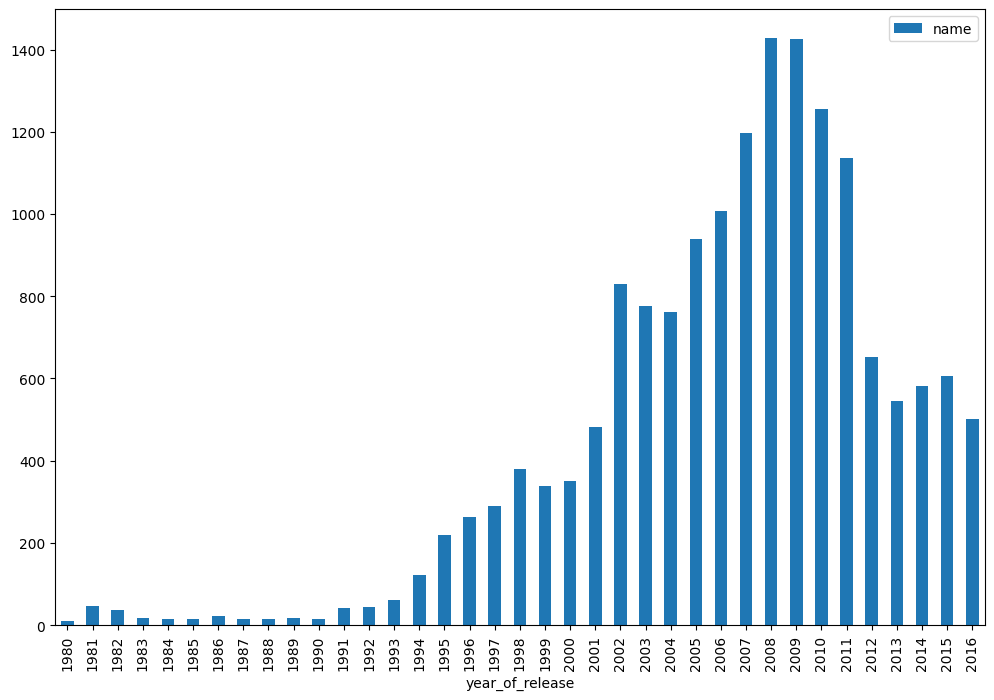

In [28]:
#Graficamos los lanzamientos anuales
pivot_years.plot(kind='bar',figsize=(12,8))

Observamos que a partir del año 1994 empiezan a incrementarse los lanzamientos de juegos, esto se alarga hasta el año 2009, en 2010 comienzan a descender.

A partir del año 2012 y hasta el 2016, observamos que los lanzamientos se mantienen muy similares, por lo que podriamos ignorar los datos posteriores a este año para el objetivo de este analísis, antes de tomar una decision, veremos las ventas por plataforma.

### Ventas por plataforma.
A continuación verificaremos las ventas por cada plataforma, con el objeto de conocer las mas populares y construir una distribución a lo largo de los años.

In [29]:
#Construimos una pivot table para agrupar los datos por plataforma.
pivot_platform=games_data.pivot_table(index='platform',values='global_sales',
                                      aggfunc='sum').sort_values(by='global_sales',ascending=False)
pivot_platform

,global_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [30]:
#Construimos un list con las 10 plataformas mas populares.
more_popular=pivot_platform.index[0:10].tolist()
more_popular

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

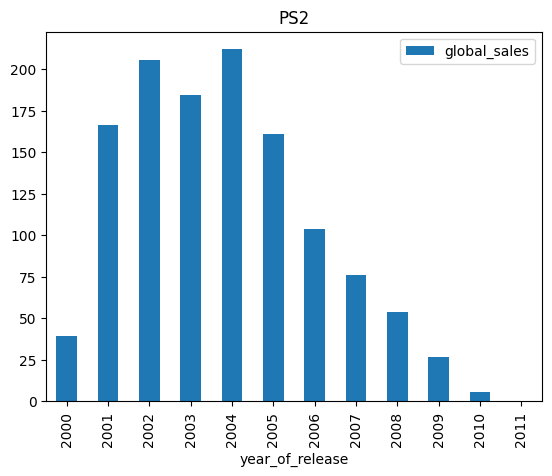

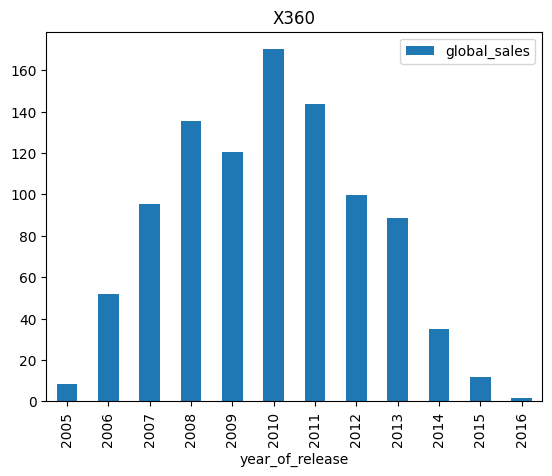

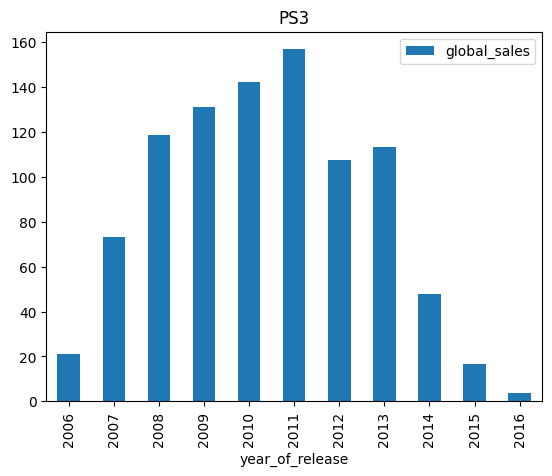

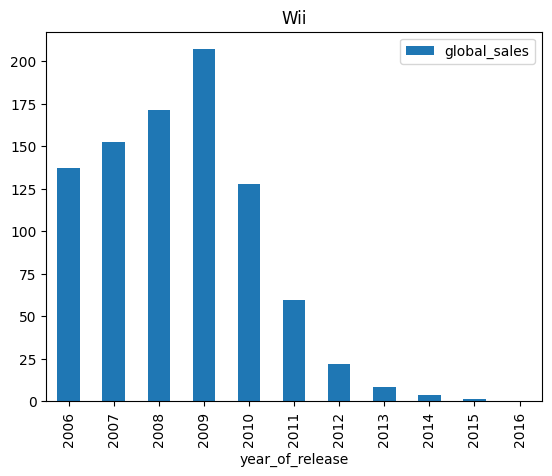

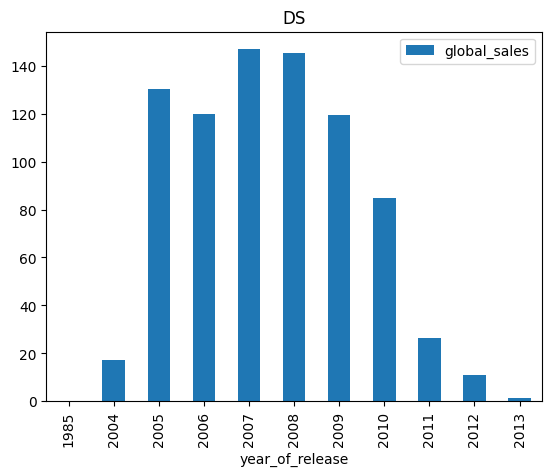

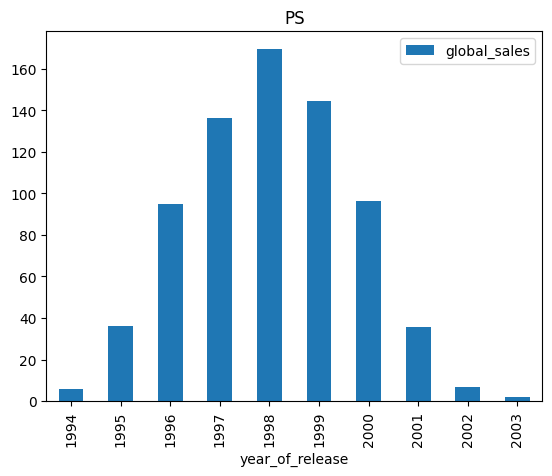

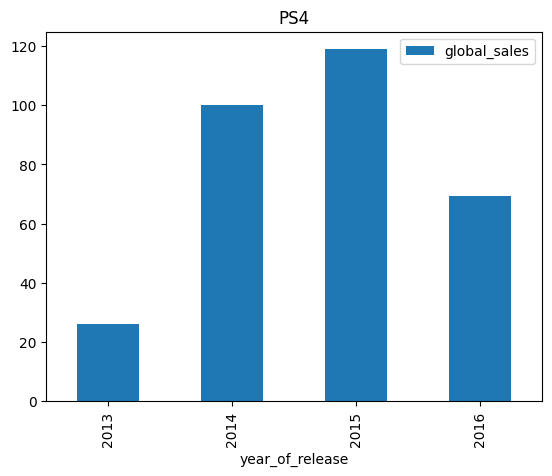

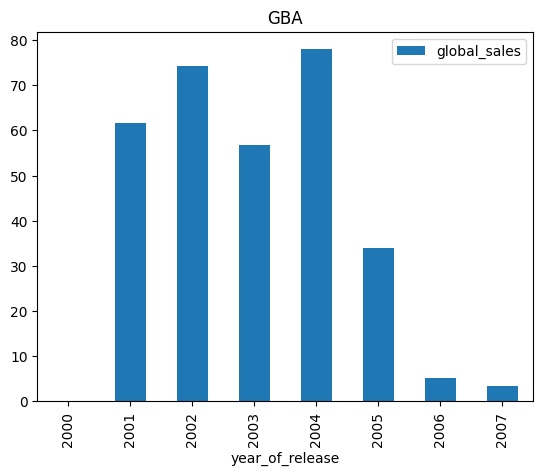

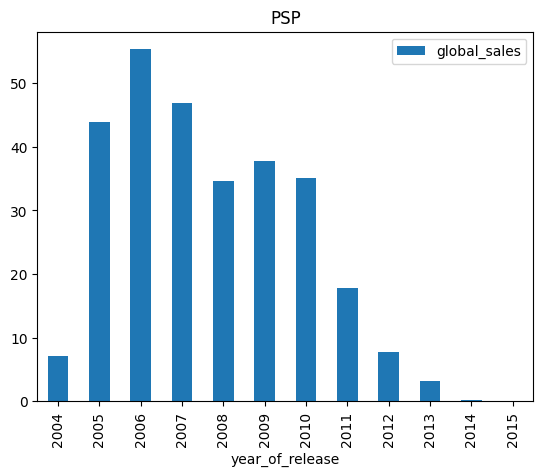

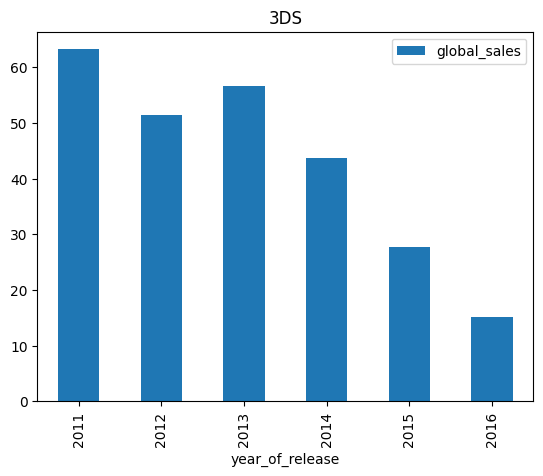

In [31]:
#Graficamos las ventas totales por año de las plataformas más populares.
for platform in more_popular:
    games_data[games_data['platform']==platform].pivot_table(index='year_of_release',values='global_sales',
                                      aggfunc='sum').plot(kind='bar',title=platform)

En base a las gráficas anteriores con las ventas de las plataformas más populares, podemos observar que las ventas se mantienen altas entre 5 y 6 años, antes de comenzar a descender, esto se podria traducir a los años en los que por lo regular las plataformas se mantienen en tendencia o el pico de su máxima popularidad, y empiezan a aparecer las plataformas que sustituyen a las salientes.

### Período para el modelo 2017.

Revisando la información anterior de ventas y lanzamiento de juegos, podemos determinar que el periodo que nos ofrecerá los datos más viables para la construcción del modelo para el 2017, es a partir del año **2011**, esto es que a partir de ese año los lanzamientos de juegos comienzan a "estabilizarse" y tomando en cuenta los años de popularidad de 5 o 6 años que observamos con las gráficas de ventas de las plataformas con la mayor cantidad de ventas.

In [32]:
#Definimos el nuevo dataset
new_games_data=games_data[games_data['year_of_release']>=2011].reset_index(drop=True)
new_games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
4,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
4018,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
4019,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
4020,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [33]:
new_games_data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       2210
user_score         1990
rating                0
global_sales          0
dtype: int64

In [34]:
#Verificamos los valores ausentes en el nuevo dataset.
((new_games_data.isnull().sum() / len(new_games_data))*100).sort_values(ascending = False)

critic_score       54.947787
user_score         49.477872
name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
rating              0.000000
global_sales        0.000000
dtype: float64

In [36]:
#revisamos los valores ausentes de critic_score
new_games_data[new_games_data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
4,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
10,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
17,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,unknown,9.18
22,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,2.79,1.72,3.14,0.41,NaN,NaN,unknown,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
4018,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
4019,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
4020,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Dado que los datos que estan ausentes son datos que son independiente de los otros e independientes entre los otros registros, si los imputamos usando alguna medida estadística puede dar resultados incorrectos en el estudio, optamos por dejarlos como tal.

### Plataformas líderes.
Se analizan las plataformas lideres en ventas.

In [37]:
#Construimos una pivot table para agrupar los datos por plataforma con el nuevo dataset
top_platform=new_games_data.pivot_table(index='platform',values='global_sales',
                                      aggfunc='sum').sort_values(by='global_sales',ascending=False)
top_platform

,global_sales
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32
PC,97.68
Wii,95.02
WiiU,82.19
PSV,53.81


Con el objeto de analizar las ventas de las plataformas a lo largo del tiempo, graficamos las ventas globales anuales de cada una de las plataformas.

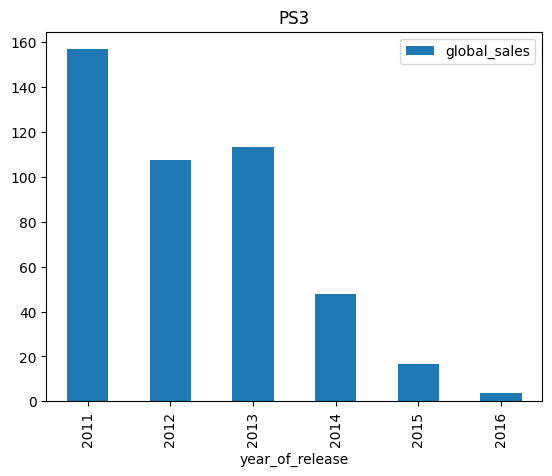

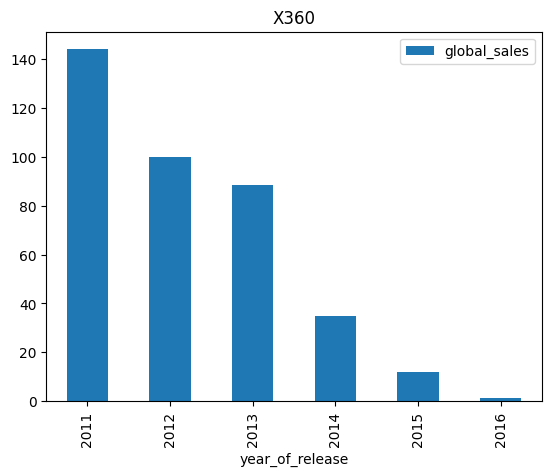

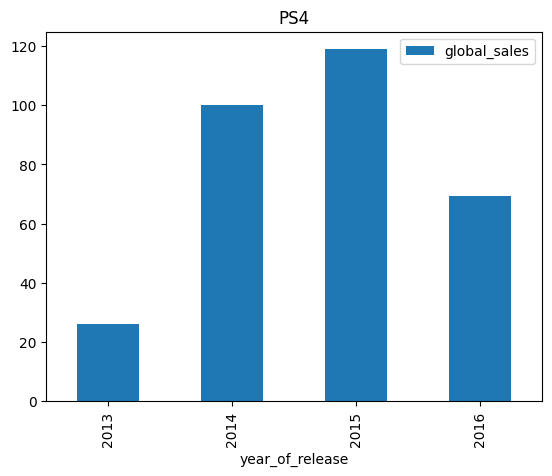

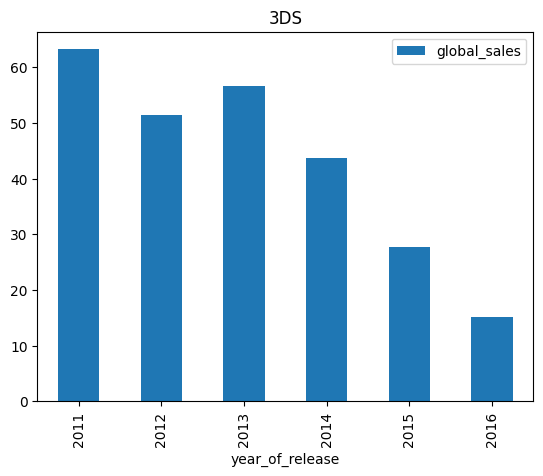

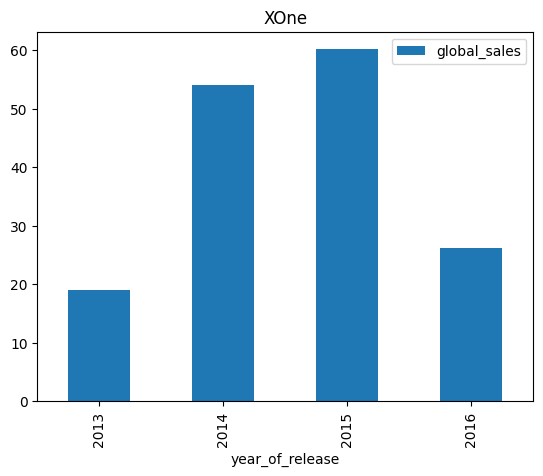

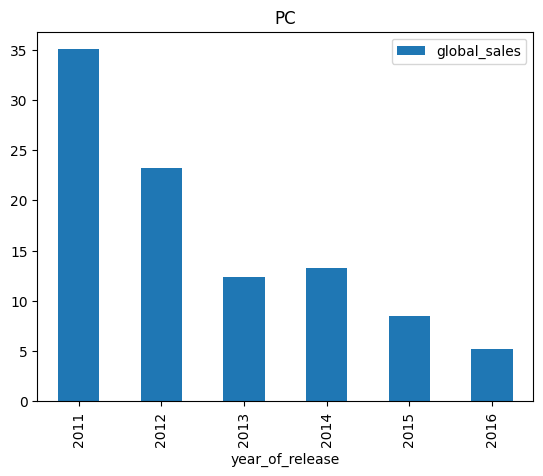

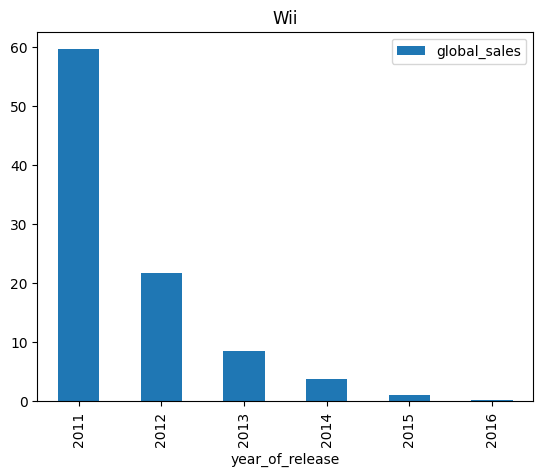

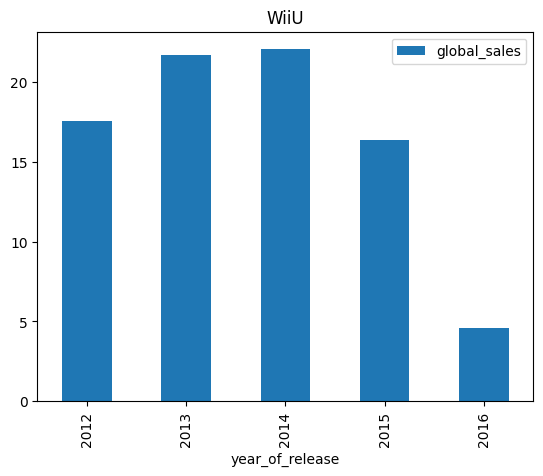

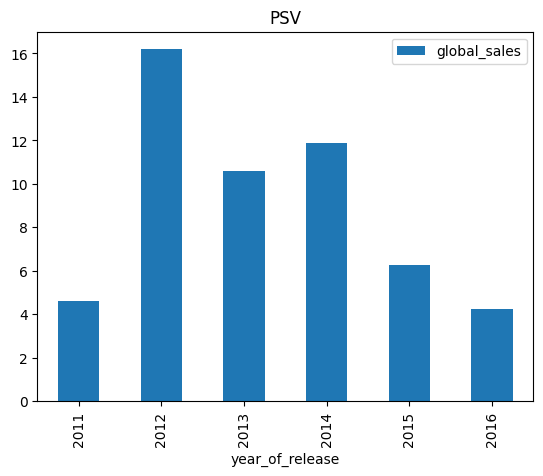

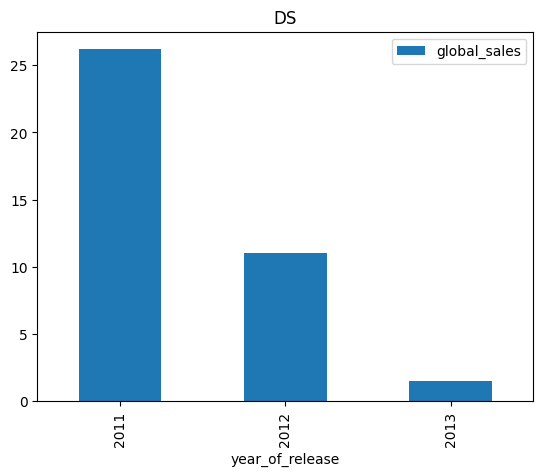

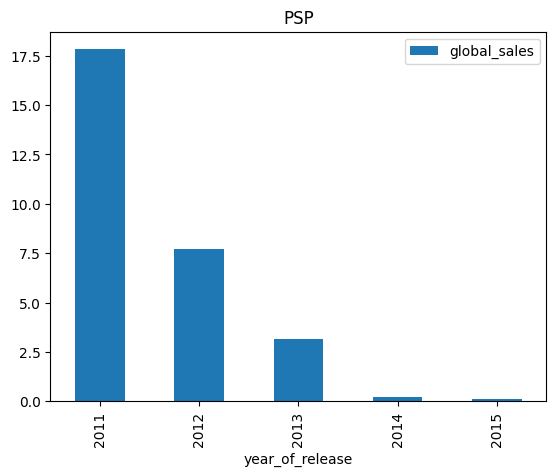

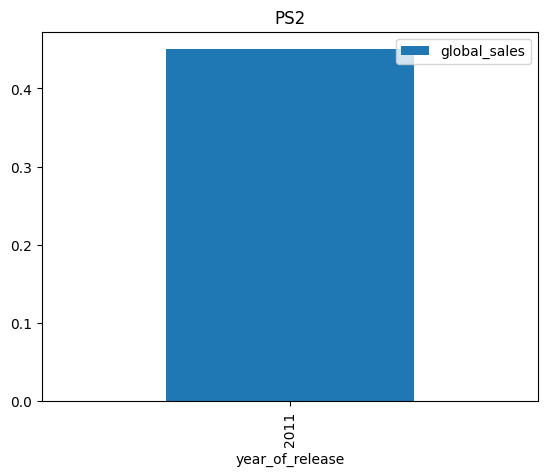

In [38]:
#Graficamos las ventas totales por año de las plataformas del dataset nuevo.
for platform in top_platform.index:
    new_games_data[new_games_data['platform']==platform].pivot_table(index='year_of_release',values='global_sales',
                                      aggfunc='sum').plot(kind='bar',title=platform)

En las graficas anteriores podemos visualizar que casi todas tienen el pico de ventas en 2011, y de ahi hacia abajo.
Por ejemplo en el caso de PS3, podemos observar que en el 2014 sufrio una caida en ventas esto se podria deber a que en el 2013 fue lanzado PS4, el caso es prácticamente el mismo para X360 y XOne y para Wii y WiiU, ya que son plataformas que son lanzadas para sustituir a la anterior.

En el caso de las portatíles de Nintendo DS y 3DS, el DS ya esta con sus ultimas ventas por 2013 y el 3DS se mantiene con ventas algo moderadas hasta el 2017, debido a los años que lleva vigente.

El caso es similar para PSP y PSV, la plataforma PS2 solo tiene ventas en 2011 por lo que no afecta en este analísis.

Para definir las plataformas líderes seleccionamos las que tienen las mayores ventas, en este caso serian PS3, X360, PS4,3DS, XOne, PC y Wii.

Generamos un dataframe nuevo, seleccionando solamente las plataformas líderes.

### Ventas globales por plataforma.


In [40]:
#Se agrupan las ventas de las plataformas mas populares
top_platform=['PS3','X360','PS4','3DS','XOne','PC','Wii']
top_games_data=new_games_data[new_games_data['platform'].isin(top_platform)]
top_games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
4,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
4012,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
4013,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
4014,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,0.01
4016,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01


In [41]:
#Se construye pivot table para agrupar las ventas de los juegos por plataforma.
platform_global_sales=top_games_data.pivot_table(index='platform',values='global_sales',
                                                aggfunc='sum').sort_values(by='global_sales',ascending=False)
platform_global_sales

,global_sales
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32
PC,97.68
Wii,95.02


Se construyen diagramas de caja de cada una de las plataformas.

Text(0.5, 1.0, 'Global sales by platform in MM')

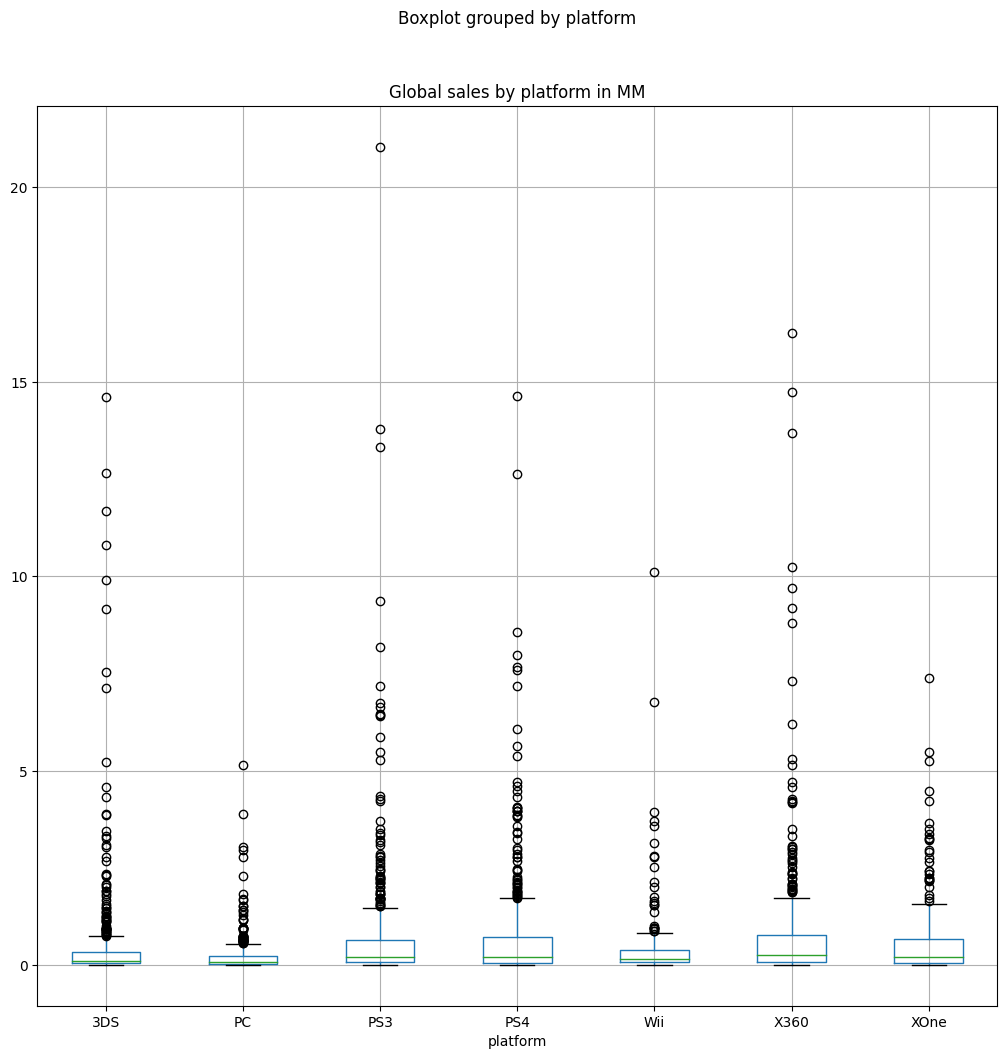

In [42]:
#Se muestran los diagramas de caja de global_sales agrupadas por plataforma.
top_games_data.boxplot(by='platform',column='global_sales',figsize=(12,12))
plt.title('Global sales by platform in MM')

Desactivamos que se muestren los valores atípicos para poder visualizar de mejor manera los datos de las ventas.

Text(0.5, 1.0, 'Global sales by platform in MM')

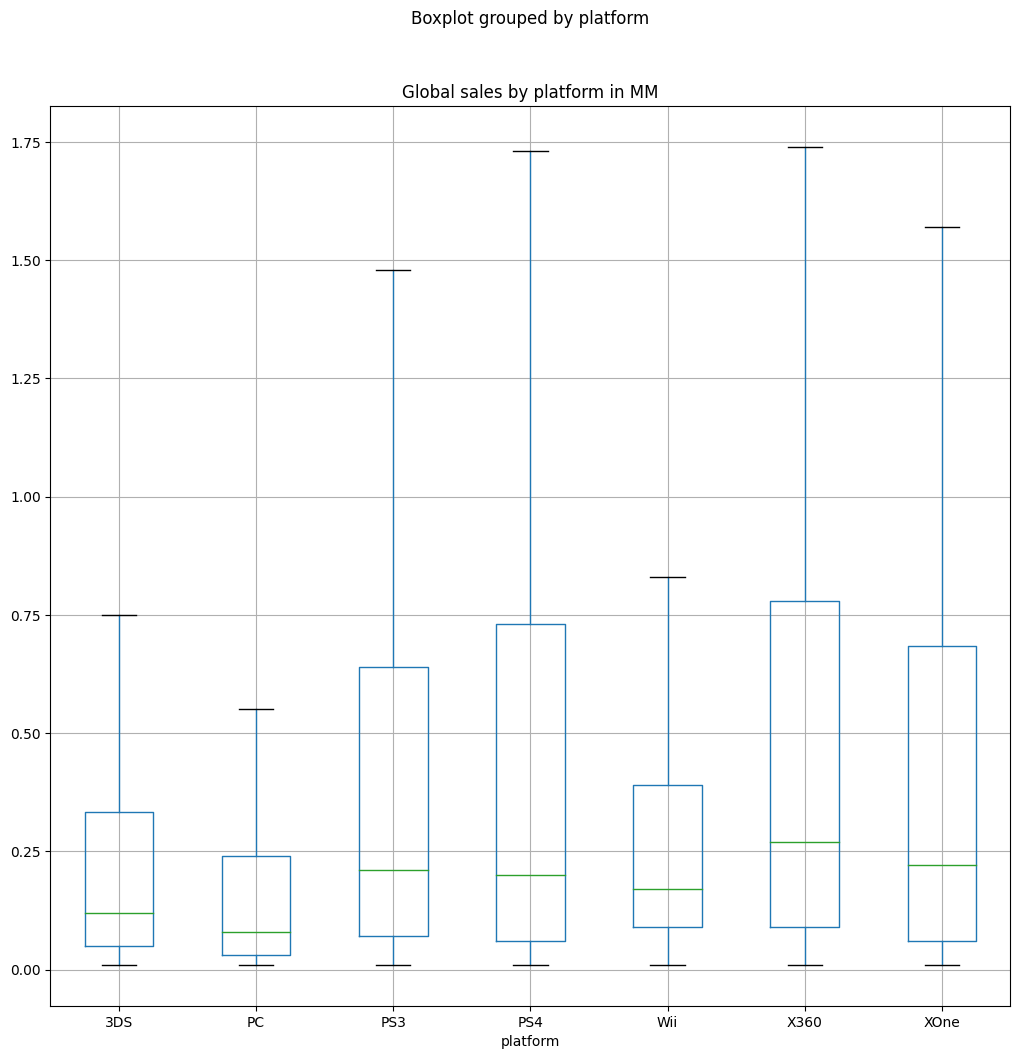

In [45]:
#Se muestran los diagramas de caja de global_sales agrupadas por plataforma.
top_games_data.boxplot(by='platform',column='global_sales',figsize=(12,12),showfliers=False)
plt.title('Global sales by platform in MM')

Del gráfico anterior podemos observar que aunque tenemos diferencias significativas entre las ventas globales entre las plataformas líderes, las primeras se mantienen muy similares, y es curioso es que la plataforma que esta en segundo lugar **X360** tiene un promedio mayor de ventas, esto puede deberse al precio de los juegos.

### Relación entre reseñas y ventas.
Se analizan la relación entre las criticas y las ventas de los juegos de la plataforma mas popular, en este caso PS3.

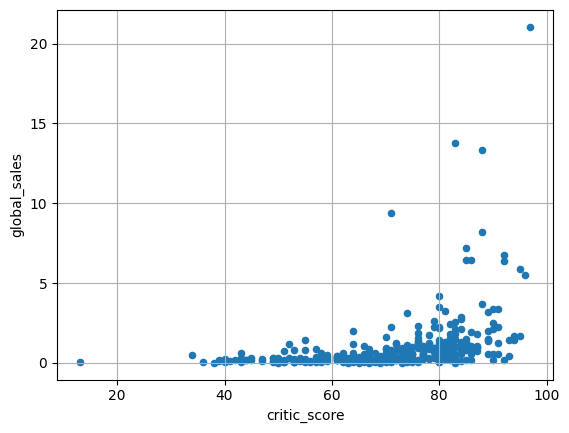

In [50]:
#Creamos diagrama de dispersión  de critic_score y global_sales de la plataforma PS3
top_games_data[top_games_data['platform']=='PS3'].plot.scatter(x='critic_score',y='global_sales')
plt.grid()

In [47]:
#Calculamos el coeficiente de correlacion
top_games_data[top_games_data['platform']=='PS3']['critic_score'].corr(top_games_data[top_games_data['platform']=='PS3']['global_sales'])

0.3801111471829076

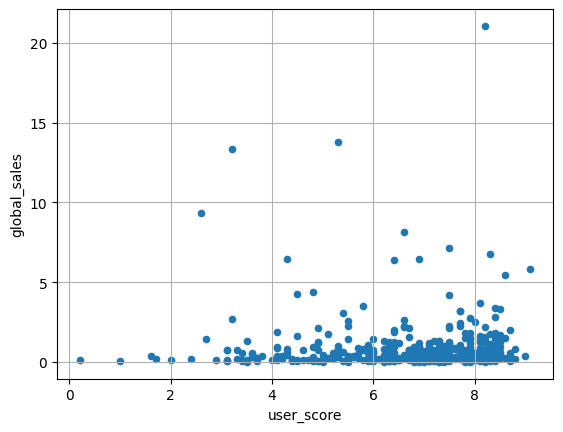

In [49]:
#Creamos diagrama de dispersión  de user_score y global_sales de la plataforma PS3
top_games_data[top_games_data['platform']=='PS3'].plot.scatter(x='user_score',y='global_sales')
plt.grid()

In [52]:
#Calculamos el coeficiente de correlacion
top_games_data[top_games_data['platform']=='PS3']['user_score'].corr(top_games_data[top_games_data['platform']=='PS3']['global_sales'])

0.014089348308019396

Verificamos la correlación ahora para la plaforma en segundo lugar X360.

<Axes: xlabel='critic_score', ylabel='global_sales'>

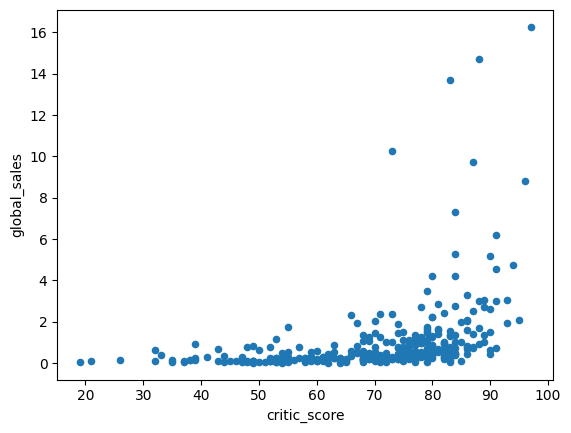

In [53]:
#Creamos diagrama de dispersión  de critic_score y global_sales de la plataforma X360
top_games_data[top_games_data['platform']=='X360'].plot.scatter(x='critic_score',y='global_sales')

In [54]:
#Calculamos el coeficiente de correlacion
top_games_data[top_games_data['platform']=='X360']['critic_score'].corr(top_games_data[top_games_data['platform']=='X360']['global_sales'])

0.3912533245484554

<Axes: xlabel='user_score', ylabel='global_sales'>

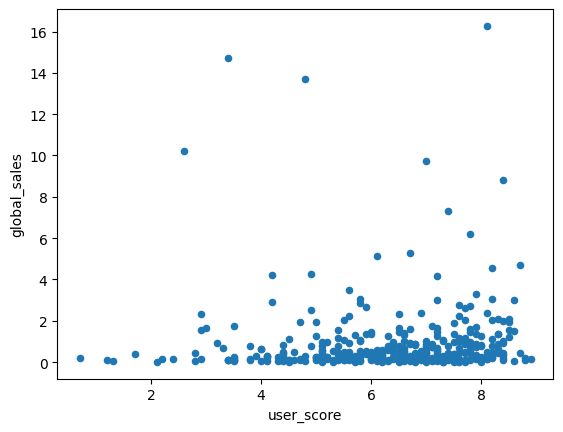

In [55]:
#Creamos diagrama de dispersión  de user_score y global_sales de la plataforma X360
top_games_data[top_games_data['platform']=='X360'].plot.scatter(x='user_score',y='global_sales')

In [56]:
#Calculamos el coeficiente de correlacion
top_games_data[top_games_data['platform']=='X360']['user_score'].corr(top_games_data[top_games_data['platform']=='X360']['global_sales'])

0.0389181707291026

De lo anterior podemos observar que existe una correlación moderada entre critic_score y global_sales, esto es debido a que por lo regular los juegos con mayores valores en las criticas suelen ser mas atractivos a los clientes y por ende tener mas ventas.

En el caso de user_score podemos observar que la correlacion no es tan fuerte, esta se encuentra un poco dispersa, esto se puede deber a que los criterios de calificación entre la crítica especializada y los usuarios es diferente, y que por lo regular el user_score es emitido una vez que el producto es adquirido.

En el caso de la plataforma que se encuentra en segundo lugar, vemos que tanto el diagrama de dispersión como el coeficiente de correlación son bastantes similares, por lo que conluimos que existe correlación positiva entre critic_score y global_sales también para la plataforma en segundo lugar.

### Mismo juego en otras plataformas.
A continuación compararemos las ventas del mismo título entre diferentes plataformas.

Para eso vemos los valores de los juegos con mas ventas.

In [57]:
#Buscamos los 10 títulos con mas ventas globales.
top_games_data.pivot_table(index='name',values='global_sales',
                                      aggfunc='sum').sort_values(by='global_sales',ascending=False).head(10)

,global_sales
name,
Grand Theft Auto V,56.58
Call of Duty: Modern Warfare 3,30.60
Call of Duty: Black Ops II,28.99
Call of Duty: Ghosts,27.04
Call of Duty: Black Ops 3,25.67
Call of Duty: Advanced Warfare,21.97
Minecraft,21.53
The Elder Scrolls V: Skyrim,21.14
Battlefield 3,17.27


Text(0.5, 1.0, 'Grand Theft Auto V sales')

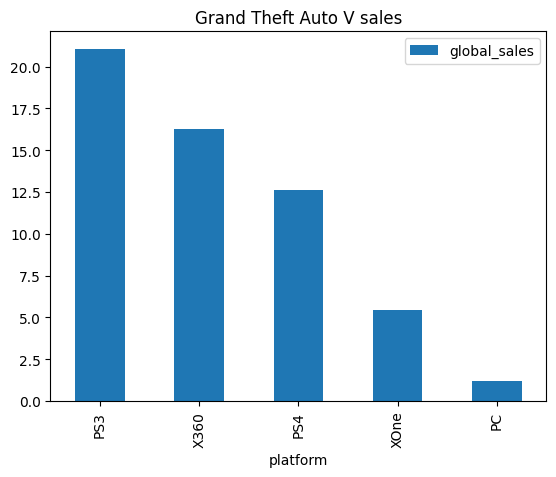

In [58]:
#Graficamos las ventas del juego Grand Theft Auto V
top_games_data[top_games_data['name']=='Grand Theft Auto V'].plot(kind='bar',x='platform',y='global_sales')
plt.title('Grand Theft Auto V sales')

Text(0.5, 1.0, 'Call of Duty: Modern Warfare 3 sales')

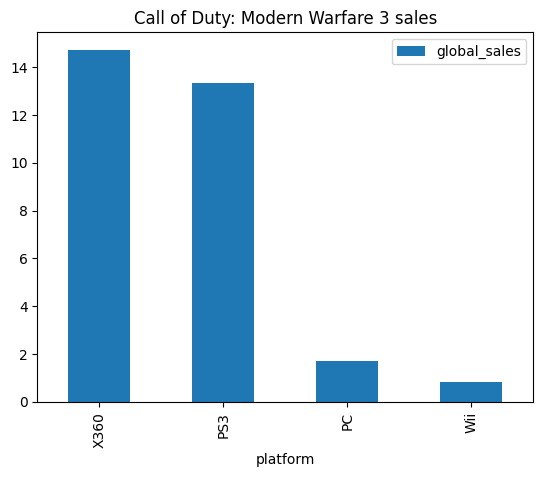

In [59]:
#Graficamos las ventas del juego Call of Duty: Modern Warfare 3
top_games_data[top_games_data['name']=='Call of Duty: Modern Warfare 3'].plot(kind='bar',x='platform',y='global_sales')
plt.title('Call of Duty: Modern Warfare 3 sales')

Text(0.5, 1.0, 'FIFA 16 sales')

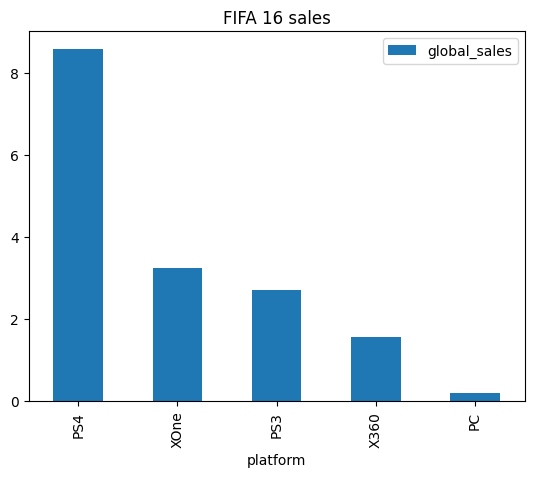

In [60]:
#Graficamos las ventas del juego FIFA 16
top_games_data[top_games_data['name']=='FIFA 16'].plot(kind='bar',x='platform',y='global_sales')
plt.title('FIFA 16 sales')

Verificamos 3 de los juegos con mas ventas y podemos observar que las plataformas mas populares son PS3, X360 y PS3, por lo que seria importante centrar la atención en estas plataformas.

### Géneros mas rentables.
En la siguiente sección, verificaremos la cantidad de las ventas de los géneros de los juegos.

In [61]:
#Construimos un pivot_table para agrupar las ventas por los géneros
genre_sales=top_games_data.pivot_table(index='genre', values='global_sales',
                                      aggfunc='sum').sort_values(by='global_sales',ascending=False)
genre_sales

,global_sales
genre,
Action,506.75
Shooter,392.71
Sports,225.34
Role-Playing,211.78
Misc,113.27
Racing,76.32
Platform,62.36
Fighting,55.31
Simulation,47.77


Text(0.5, 1.0, 'Sales by genre in MM')

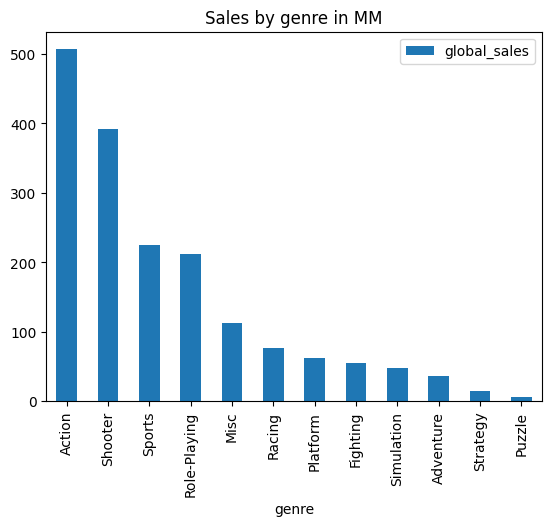

In [62]:
genre_sales.plot(kind='bar')
plt.title('Sales by genre in MM')

Los géneros mas populares son los de acción, que coincide con el juego de Grand Theft Auto V que vimos en secciones anteriores que es el que tiene mas ventas, seguido por el Shooter, categoría donde entran los juegos de Call of Duty que también estan entre los mas vendidos.

A los generos anteriores les siguen los géneros de Sports y Role_Playing, donde caen los juegos de Fifa y juegos como Fallout 4, que fueron muy populares cuando fueron lanzados.

En el caso de los juegos con mas ventas, tenemos los de Strategy y Puzzle, en el caso de los primeros son juegos que son populares pricipalmente en PC y que tienen lanzamientos mas espaciados entre los años, y para Puzzle suele ser mas popular en móviles.

## Perfiles de usuarios por región.

En esta sección para cada región (NA, UE y JP) se determinará lo siguiente:

* Las 5 plataformas más populares.
* Los 5 géneros principales.
* ¿Las clasificaciones ESRB afectan a las ventas de las regiones individuales?

### Las 5 plataformas principales.
Se verificaran las plataformas más populares en cada una de las regiones.

#### Región NA.
Revisamos las ventas por plataforma de la región de North America (NA).

In [63]:
#Agrupamos las ventas de NA por plataforma
top_games_data.pivot_table(index='platform',values='na_sales',
                                       aggfunc='sum').sort_values(by='na_sales',ascending=False)

,na_sales
platform,
X360,226.80
PS3,168.26
PS4,108.74
XOne,93.12
3DS,82.65
Wii,48.56
PC,29.88


Text(0.5, 1.0, 'North America Sales 2011-2017')

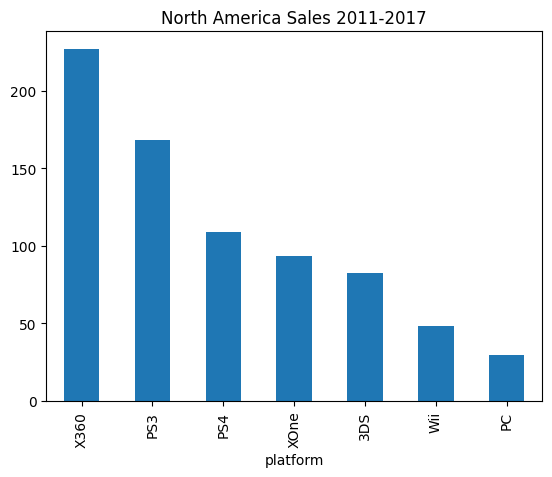

In [65]:
#graficamos la tabla anterior para visualizar mejor las diferencias.
top_games_data.pivot_table(index='platform',values='na_sales',
                                       aggfunc='sum').sort_values(by='na_sales',ascending=False).plot(kind='bar',
                                                                                                     legend=False)
plt.title('North America Sales 2011-2017')

#### Región UE.
Revisamos las ventas por plataforma de Europa (EU).

In [66]:
#Agrupamos las ventas de ue por plataforma
top_games_data.pivot_table(index='platform',values='eu_sales',
                                       aggfunc='sum').sort_values(by='eu_sales',ascending=False)

,eu_sales
platform,
PS3,163.10
PS4,141.09
X360,117.10
3DS,61.27
PC,56.70
XOne,51.59
Wii,29.60


Text(0.5, 1.0, 'Europe Sales 2011-2017')

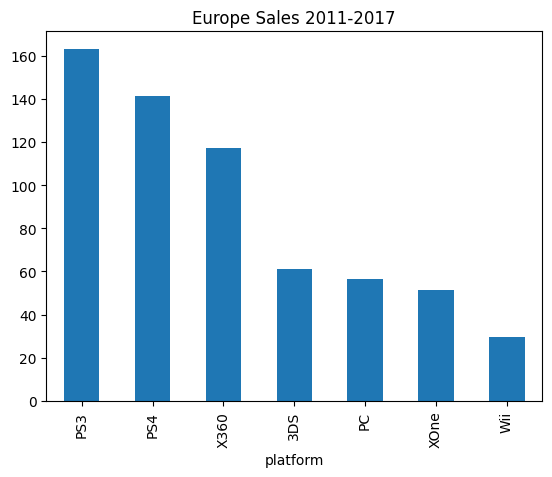

In [67]:
#Graficamos las ventas en Europa.
top_games_data.pivot_table(index='platform',values='eu_sales',
                                       aggfunc='sum').sort_values(by='eu_sales',ascending=False).plot(kind='bar',
                                                                                                     legend=False)
plt.title('Europe Sales 2011-2017')

#### Region JP.
Revisamos las ventas por plataforma de Japón (JP).

In [68]:
#Agrupamos las ventas de japon por plataforma
top_games_data.pivot_table(index='platform',values='jp_sales',
                                       aggfunc='sum').sort_values(by='jp_sales',ascending=False)

,jp_sales
platform,
3DS,100.62
PS3,49.39
PS4,15.96
Wii,8.97
X360,3.35
XOne,0.34
PC,0.00


Text(0.5, 1.0, 'Japan Sales 2011-2017')

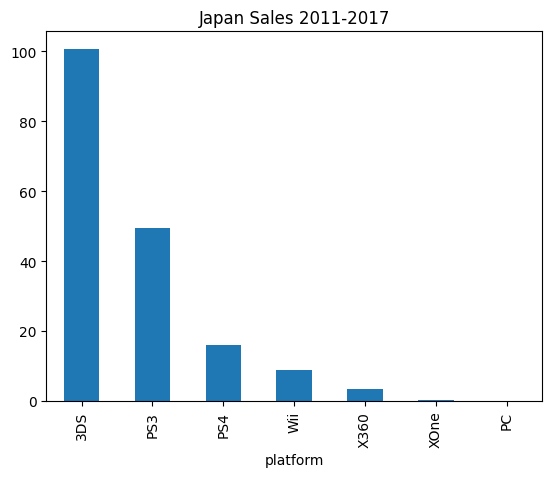

In [69]:
#Graficamos las ventas en Japón.
top_games_data.pivot_table(index='platform',values='jp_sales',
                                       aggfunc='sum').sort_values(by='jp_sales',ascending=False).plot(kind='bar',
                                                                                                     legend=False)
plt.title('Japan Sales 2011-2017')

Podemos observar que existe gran diferencia en las plataformas en base a las regiones, esto es debido a que desde su lanzamiento Xbox 360 ha dominado las ventas en Norte América, Europa se mantiene como lider Playstation tanto el PS3 como el PS4 y para la región de Japón el 3DS de Nintendo es quien está a la cabeza de las ventas.

### Géneros más populares.
En esta sección veremos cuáles son los géneros mas populares en cada una de las regiones.

#### Región NA.
Revisamos los géneros mas populares en North América (NA).

In [71]:
#Agrupamos las ventas de NA por género
top_games_data.pivot_table(index='genre',values='na_sales',
                                       aggfunc='sum').sort_values(by='na_sales',ascending=False)

,na_sales
genre,
Action,212.56
Shooter,190.36
Sports,104.83
Role-Playing,76.73
Misc,59.92
Fighting,26.80
Racing,26.78
Platform,26.45
Adventure,13.70


Text(0.5, 1.0, 'Sales by Genre North America')

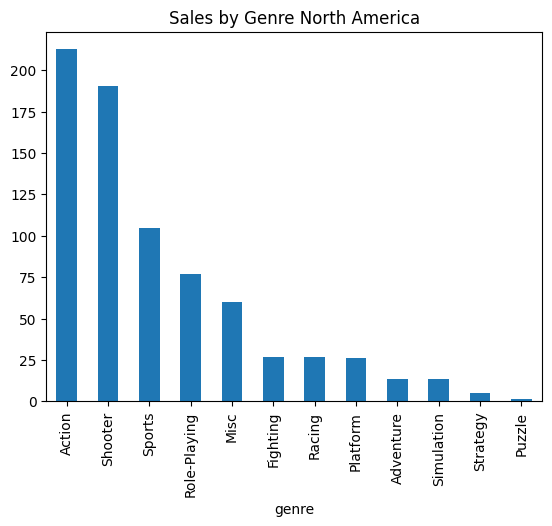

In [72]:
#Gráficamos las ventas de na por género
top_games_data.pivot_table(index='genre',values='na_sales',
                                       aggfunc='sum').sort_values(by='na_sales',ascending=False).plot(kind='bar',legend=False)
plt.title('Sales by Genre North America')

#### Región UE.
Revisamos los géneros mas populares en Europa (EU).

In [73]:
#Agrupamos las ventas de eu por género
top_games_data.pivot_table(index='genre',
                           values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)

,eu_sales
genre,
Action,184.81
Shooter,144.74
Sports,85.42
Role-Playing,58.31
Racing,36.47
Misc,32.74
Platform,21.89
Simulation,19.36
Fighting,13.91


Text(0.5, 1.0, 'Sales by Genre Europe')

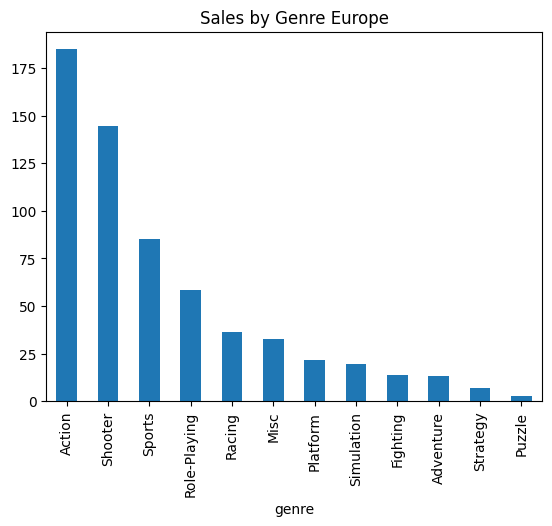

In [74]:
#Gráficamos las ventas de eu por género
top_games_data.pivot_table(index='genre',values='eu_sales',
                                       aggfunc='sum').sort_values(by='eu_sales',ascending=False).plot(kind='bar',legend=False)
plt.title('Sales by Genre Europe')

#### Región JP.
Revisamos los géneros mas populares en Japón (JP).

In [75]:
#Agrupamos las ventas de Japón por género
top_games_data.pivot_table(index='genre',
                           values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)

,jp_sales
genre,
Role-Playing,58.77
Action,49.91
Simulation,11.39
Shooter,10.14
Misc,10.11
Fighting,8.95
Platform,7.98
Sports,7.44
Adventure,5.28


Text(0.5, 1.0, 'Sales by Genre Japan')

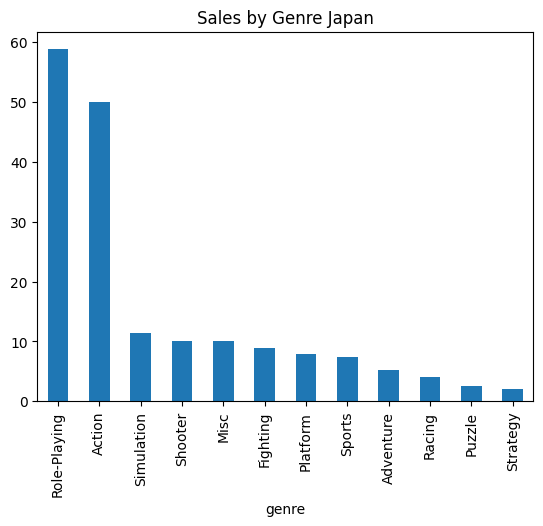

In [77]:
#Gráficamos las ventas de Japón por género
top_games_data.pivot_table(index='genre',values='jp_sales',
                                       aggfunc='sum').sort_values(by='jp_sales',ascending=False).plot(kind='bar',legend=False)
plt.title('Sales by Genre Japan')

Para los géneros, podemos observar que tanto en Norte América como Europa son mas populares Action, Shooter y Sports, mientras que para Japón son Role-Playing, Action y Simulation, esto es debido a que en Japón los juegos de Role-Playing son de los mas jugados, al grado de generar gran afluencia de personas en los lanzamientos.

### La clasificación ESRB.
A continuacion veremos las ventas en base a las clasificaciones ESRB.

In [81]:
#Agrupamos las ventas en base a la clasificación
sales_by_rate = top_games_data.pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
sales_by_rate

,eu_sales,jp_sales,na_sales
rating,,,
E,124.44,27.96,143.36
E10+,65.59,7.87,101.07
M,246.12,23.86,302.69
RP,0.03,0.00,0.00
T,78.64,25.61,102.92
unknown,105.63,93.33,107.97


In [88]:
#Eliminamos la clasificación RP debido a su valor muy bajo
sales_by_rate.drop(['RP'], inplace=True)

In [89]:
sales_by_rate

,eu_sales,jp_sales,na_sales
rating,,,
E,124.44,27.96,143.36
E10+,65.59,7.87,101.07
M,246.12,23.86,302.69
T,78.64,25.61,102.92
unknown,105.63,93.33,107.97


<Axes: xlabel='rating'>

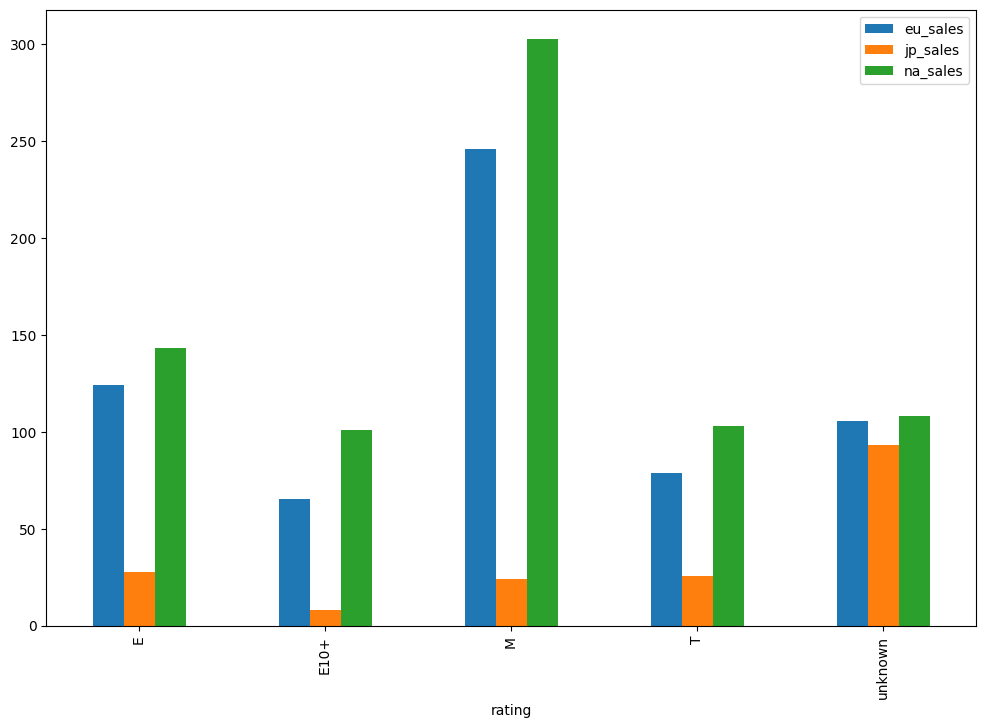

In [90]:
#Graficamos la tabla para mejor visualización
sales_by_rate.plot(kind='bar',figsize=(12,8))

La clasificación ESRB es rating que solo se maneja o existe en Norte América, las otras regiones tienen sus propias clasificaciones, por lo que se aprecian menos ventas en dichas regiones.

Podemos observar en la gráfica anterior que las clasificaciones con mas ventas es la M (Mature), seguida por E(Everyone), y que la diferencia entre NA y Europa no es tan grande, esto podria ser a que la clasificacion que manejan en Europa tiene algunas similitudes con la ESRB.

## Pruebas de hipótesis.
Se verificarán las siguientes 2 hipótesis.
* Las calificaciones promedio de usuarios Xbox One y PC son las mismas.
* Las calificaiones promedio de usuarios los generos Action y Sports son diferentes.

### Las calificaciones promedio de los usuarios de Xbox One y PC son las mismas.
La hipótesis afirma que las calificaciones promedio de los usuarios de Xbox One y PC son las mismas, por lo tanto las hipótesis se determinan de la siguiente manera:

**Hipótesis nula H0**:Las calificaciones promedio de los usuarios de Xbox One y PC son iguales.

**Hipótesis Alternativa Ha**: Las calificaciones promedio de los usuarios de Xbox One y PC no son iguales.

El valor alpha a utilizar será de **0.05**.

In [91]:
#Se extraen las calificaciones de Xbox One
xone_user=top_games_data[top_games_data['platform']=='XOne']['user_score']
#Se eliminan los valores ausentes para que no causen conflictos futuros.
xone_user=xone_user.dropna().reset_index(drop=True)
xone_user

0      7.9
1      5.4
2      6.4
3      6.2
4      4.1
      ... 
177    6.8
178    6.0
179    8.2
180    6.6
181    6.7
Name: user_score, Length: 182, dtype: float64

In [92]:
#Se extraen las calificaciones de PC
pc_user=top_games_data[top_games_data['platform']=='PC']['user_score']
#Se eliminan los valores ausentes
pc_user=pc_user.dropna().reset_index(drop=True)
pc_user

0      4.0
1      8.1
2      3.9
3      5.9
4      7.5
      ... 
302    1.4
303    7.9
304    7.6
305    5.8
306    7.2
Name: user_score, Length: 307, dtype: float64

In [93]:
#se define la variable alpha
alpha=0.05

Se utiliza una prueba T, para comparar las medias de las dos poblaciones, en este caso los usuarios de Xbox One y los de PC.

In [94]:
#Se utiliza el método ttest
results = st.ttest_ind(xone_user, pc_user,equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  0.6267602271422398
No rechazamos la hipótesis nula


Se precisa la prueba T, verificando las diferencias de las varianzas.

In [95]:
#Se utiliza el método ttest
results = st.ttest_ind(xone_user, pc_user,equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  0.6130712247638477
No rechazamos la hipótesis nula


Observamos que el p-value es mayor que el parametro alpha de alrededor del 60%, lo que significa que existe esa probabilidad de tomar dos valores al azar entre las calificaciones de usuarios de Xbox One y PC, y que estos sean iguales. Dado lo anterior no existen argumentos suficientes para rechazar la **Hipótesis nula** que indicaba que los valores entre las calificaciones de los usarios de estas plataformas son iguales.

### Las calificaciones promedio de los usuarios de Action y Sports con diferentes.

La hipótesis afirma que las calificaciones promedio de los usuarios del género Action y Sports son diferentes, por lo tanto las hipótesis se determinan de la siguiente manera:

**Hipótesis nula H0**:Las calificaciones promedio de los usuarios de los géneros Action y Sports son iguales.

**Hipótesis Alternativa Ha**: Las calificaciones promedio de los usuarios de los géneros Action y Sports difieren.

El valor alpha a utilizar será de **0.05**.

In [96]:
#Extraemos las calificaciones del genero Action
action_user=top_games_data[top_games_data['genre']=='Action']['user_score']
#Se eliminan los valores ausentes para que no causen conflictos futuros.
action_user=action_user.dropna().reset_index(drop=True)
action_user

0      8.2
1      8.1
2      8.3
3      6.6
4      8.3
      ... 
559    7.9
560    6.0
561    5.1
562    6.7
563    7.6
Name: user_score, Length: 564, dtype: float64

In [97]:
#Extraemos las calificaciones del genero Sports
sports_user=top_games_data[top_games_data['genre']=='Sports']['user_score']
#Se eliminan los valores ausentes para que no causen conflictos futuros.
sports_user=sports_user.dropna().reset_index(drop=True)
sports_user

0      4.3
1      5.0
2      4.3
3      5.7
4      4.5
      ... 
221    6.9
222    5.5
223    4.5
224    1.4
225    6.6
Name: user_score, Length: 226, dtype: float64

Utilizamos una prueba T con el metodo ttest_ind, para hacer las comparaciones entre las dos poblaciones de los usuarios de ambos géneros de juegos.

In [98]:
#Se utiliza el metodo con ttest
results = st.ttest_ind(action_user, sports_user)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  1.7669336686516873e-21
Rechazamos la hipótesis nula


Se observa que el p-value es mas bajo con respecto al parámetro alpha, por lo tanto existen argumentos suficentes para poder rechazar la **hipótesis nula** que nos decia que las calificaciones promedio entre los géneros Action y Sports son iguales, ya que existe una probabilidad **muy baja** de que eligiendo dos valores al azar de ambos géneros estas sean iguales.

## Conclusión General.

En la tabla con la información se encontró una gran cantidad de valores ausentes en las reseñas, tanto en la de la crítica especializada como en la de los usuarios, dada la naturaleza de estos datos no fue recomendable rellenarlos con alguna medida estadística y se dejaron tal cual, esto fue con el objeto de llegar a conlusiones o recomendaciones no adecuadas.

De igual manera se encontro un promedio de la "vida útil" de las plataformas, que es entre 6 y 7 años, esto fue con la finalidad de encontrar tendencias y poder obtener la información que nos pueda indicar los patrones que se puedan utilizar para planificar la campaña 2017.

Para lo anterior se utilizaron los datos a partir del 2011 y las plataformas mas populares, que fueron PS3, X360, PS4, 3DS, XOne y PC.

Las calificaciones de la crítica tienen un efecto positivo en la cantidad de ventas de los juegos, por lo que para la campaña 2017 se sugiere poner enfocarse en los juegos con los scores mas altos.

Aunque en menor medida el score de los usuarios también tienen impacto en las ventas, por lo que se sugiere poner atención en los titulos con mayores calificaciones de los usuarios, ofreciendo algún tipo de promoción o incentivo en las compras.

Dadas las tendencias de compra en cada región es necesario que se tenga una campaña diferente según la region objetivo.

* Norte América, enfocarse en la plataforma Xbox y en los géneros de Action, Shooter y Sports.
* Europa, enfocarse en la plataforma PlayStation y en los géneros Action, Shooter y Sports.
* Japón, enfocarse en Nintendo y PlayStation y el género mas popular es el de Role_Playing, seguido por Action y Simulation.

En base a que los generos mas populares son Action, Shooter y Sports, y que los promedios de las calificaciones de los usuarios de Action y Sports son muy cercanas, se sugiere hacer promociones que permitan que estos géneros sean adquiridos juntos.